In [1]:
from PIL import Image
import glob


In [2]:
files = glob.glob('D://vgg19/project/archive/LabelledRice/Resized/*/*')

In [9]:

#files = glob.glob('D://vgg19/project/archive/LabelledRice/Resized/*/*')

In [3]:
#files_reshape = list(map(lambda x: x.replace('/Labelled\\', '/Resized\\'), files))

In [3]:
basewidth = 300

for file, file_save in zip(files, files_reshape):
    img = Image.open(file)
    wpercent = basewidth / float(img.size[0])
    hsize = int(float(img.size[1]) * float(wpercent))
    img = img.resize((basewidth, hsize), Image.LANCZOS)
    img.save(file_save)

NameError: name 'files_reshape' is not defined

In [4]:
from skimage.morphology import binary_closing, binary_opening, erosion

In [5]:
files_bgremoved = list(map(lambda x: x.replace('/Resized\\', '/backgroundremove\\'), files))

In [6]:
import numpy as np

In [8]:
selem = np.zeros((25, 25))

ci,cj=12, 12
cr=13

# Create index arrays to z
I,J=np.meshgrid(np.arange(selem.shape[0]),np.arange(selem.shape[1]))

# calculate distance of all points to centre
dist=np.sqrt((I-ci)**2+(J-cj)**2)

# Assign value of 1 to those points where dist<cr:
selem[np.where(dist<=cr)]=1

In [9]:
%matplotlib inline
import numpy as np
from scipy import ndimage

# fig, ax = plt.subplots(20,2, figsize=(10,80))
idx = 0
for file, file_save in zip(files, files_bgremoved):
    bg_frac = 0
    thres = 220
    img = Image.open(file)
    im_arr = np.array(img)
#     ax[idx, 0].imshow(im_arr)
    R = im_arr[:, :, 0]
    G = im_arr[:, :, 1]
    B = im_arr[:, :, 2]
    while bg_frac < 0.6:
        bg_mask = ((R>thres) | (B>thres))# & (G < 100)
        bg_frac = bg_mask.sum()/len(bg_mask.flatten())
        thres -= 5
    # we use opening first since our mask is reversed (the foreground and background are reversed here)
    bg_mask = binary_closing(erosion(binary_opening(bg_mask, selem), np.ones((3, 3))), np.ones((5,5)))

    #Get biggest blob
    label, num_label = ndimage.label(~bg_mask)
    size = np.bincount(label.ravel())
    biggest_label = size[1:].argmax() + 1
    bg_mask = label == biggest_label

    im_arr[~bg_mask, 0] = 255
    im_arr[~bg_mask, 1] = 255
    im_arr[~bg_mask, 2] = 255

    img = Image.fromarray(im_arr)
    img.save(file_save)
    idx+=1

(array([ 3705.,  1766.,   529.,   401.,  1524.,  7034.,  5053., 16875.,
          554., 52259.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <BarContainer object of 10 artists>)

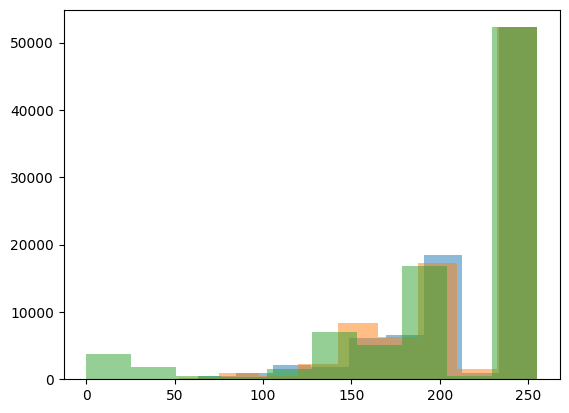

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(R.flatten(), alpha=0.5)
plt.hist(G.flatten(), alpha=0.5)
plt.hist(B.flatten(), alpha=0.5)

In [2]:
from PIL import Image
import glob
import os
from skimage.morphology import binary_closing, binary_opening, erosion
import numpy as np
from scipy import ndimage

# Function to remove background
def remove_background(file, save_path):
    selem = np.zeros((25, 25))

    ci, cj = 12, 12
    cr = 13

    # Create index arrays to z
    I, J = np.meshgrid(np.arange(selem.shape[0]), np.arange(selem.shape[1]))

    # calculate distance of all points to centre
    dist = np.sqrt((I - ci) ** 2 + (J - cj) ** 2)

    # Assign value of 1 to those points where dist<cr:
    selem[np.where(dist <= cr)] = 1

    bg_frac = 0
    thres = 220

    img = Image.open(file)
    im_arr = np.array(img)

    R = im_arr[:, :, 0]
    G = im_arr[:, :, 1]
    B = im_arr[:, :, 2]

    while bg_frac < 0.6:
        bg_mask = ((R > thres) | (B > thres))
        bg_frac = bg_mask.sum() / len(bg_mask.flatten())
        thres -= 5

    bg_mask = binary_closing(erosion(binary_opening(bg_mask, selem), np.ones((3, 3))), np.ones((5, 5)))

    # Get biggest blob
    label, num_label = ndimage.label(~bg_mask)
    size = np.bincount(label.ravel())
    biggest_label = size[1:].argmax() + 1
    bg_mask = label == biggest_label

    im_arr[~bg_mask, 0] = 255
    im_arr[~bg_mask, 1] = 255
    im_arr[~bg_mask, 2] = 255

    img = Image.fromarray(im_arr)
    img.save(save_path)

# Define input and output paths
input_path = 'D://vgg19/project/archive/LabelledRice/Resized/*/*'
output_path = 'D://vgg19/project/archive/LabelledRice/backgroundRemoved/'

# Create the output directory if it doesn't exist
os.makedirs(output_path, exist_ok=True)

# Get the list of files
files = glob.glob(input_path)

# Loop over files and remove background
for file in files:
    file_name = os.path.basename(file)
    save_path = os.path.join(output_path, file_name)
    remove_background(file, save_path)


KeyboardInterrupt: 